In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import infoshare.utils as utils

In [3]:
# # plotting config
# sns.set_style("white")
# # in inches
TEXTWIDTH = 6.30045
COLWIDTH = 3.03209
# # colormap to use
cmap = sns.diverging_palette(20, 145, as_cmap=True)
# # dictionary of label font config
# label_dict = {"weight": "bold"}

In [4]:
lswsd_eval_path = f"../lightning_logs/roberta-base/LSWSD/agg=mean_probe=12/evaluation"
lswsd_acc_drop = utils.get_acc_drop(
    lswsd_eval_path, None, suffix_filter=r"^([A-Z]+)$", metric_name="acc"
).T

In [5]:
lswsd_acc_drop

Neutralizer,ADJ,ADP,ADV,AUX,CCONJ,DET,INTJ,NOUN,NUM,PART,PRON,PROPN,PUNCT,SCONJ,SYM,VERB,X
Target,,,,,,,,,,,,,,,,,
AGE%1:07:00::,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
AGE%1:28:00::,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AGE%1:28:02::,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
AGE%2:30:00::,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AGE%2:30:01::,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TODAY%1:28:01::,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TODAY%4:02:00::,NaN,NaN,NaN,NaN,NaN,NaN,inf,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TODAY%4:02:01::,NaN,NaN,NaN,NaN,NaN,NaN,inf,NaN,inf,NaN,NaN,inf,inf,NaN,inf,NaN,NaN


In [8]:
lswsd_base_series = utils.get_baseline_series(lswsd_eval_path)

In [18]:
lswsd_base_series

avg                            0.785278
UNK                            0.000000
COST%1:21:00::                 0.628986
EXPRESS%5:00:00:EXPLICIT:00    0.000000
NOW%4:02:05::                  0.460564
                                 ...   
LATER%4:02:02::                0.000000
LESS%4:02:00::                 0.256293
PERMIT%2:32:00::               0.585812
JUST%4:02:03::                 0.000000
LIST%2:32:00::                 0.292906
Length: 145, dtype: float64

In [15]:
len(lswsd_base_series[lswsd_base_series > 0.6])

14

In [6]:
# keep_senses = [
#     "RESULT%1:19:00::",
#     "RESULT%2:42:00::",
#     "MOST%3:00:02::",
#     "MOST%4:02:00::",
#     "THEN%4:02:00::",
#     "THEN%4:02:02::",
# ]
keep_pos = ["ADJ", "NOUN", "ADV", "VERB", "NUM", "X"]

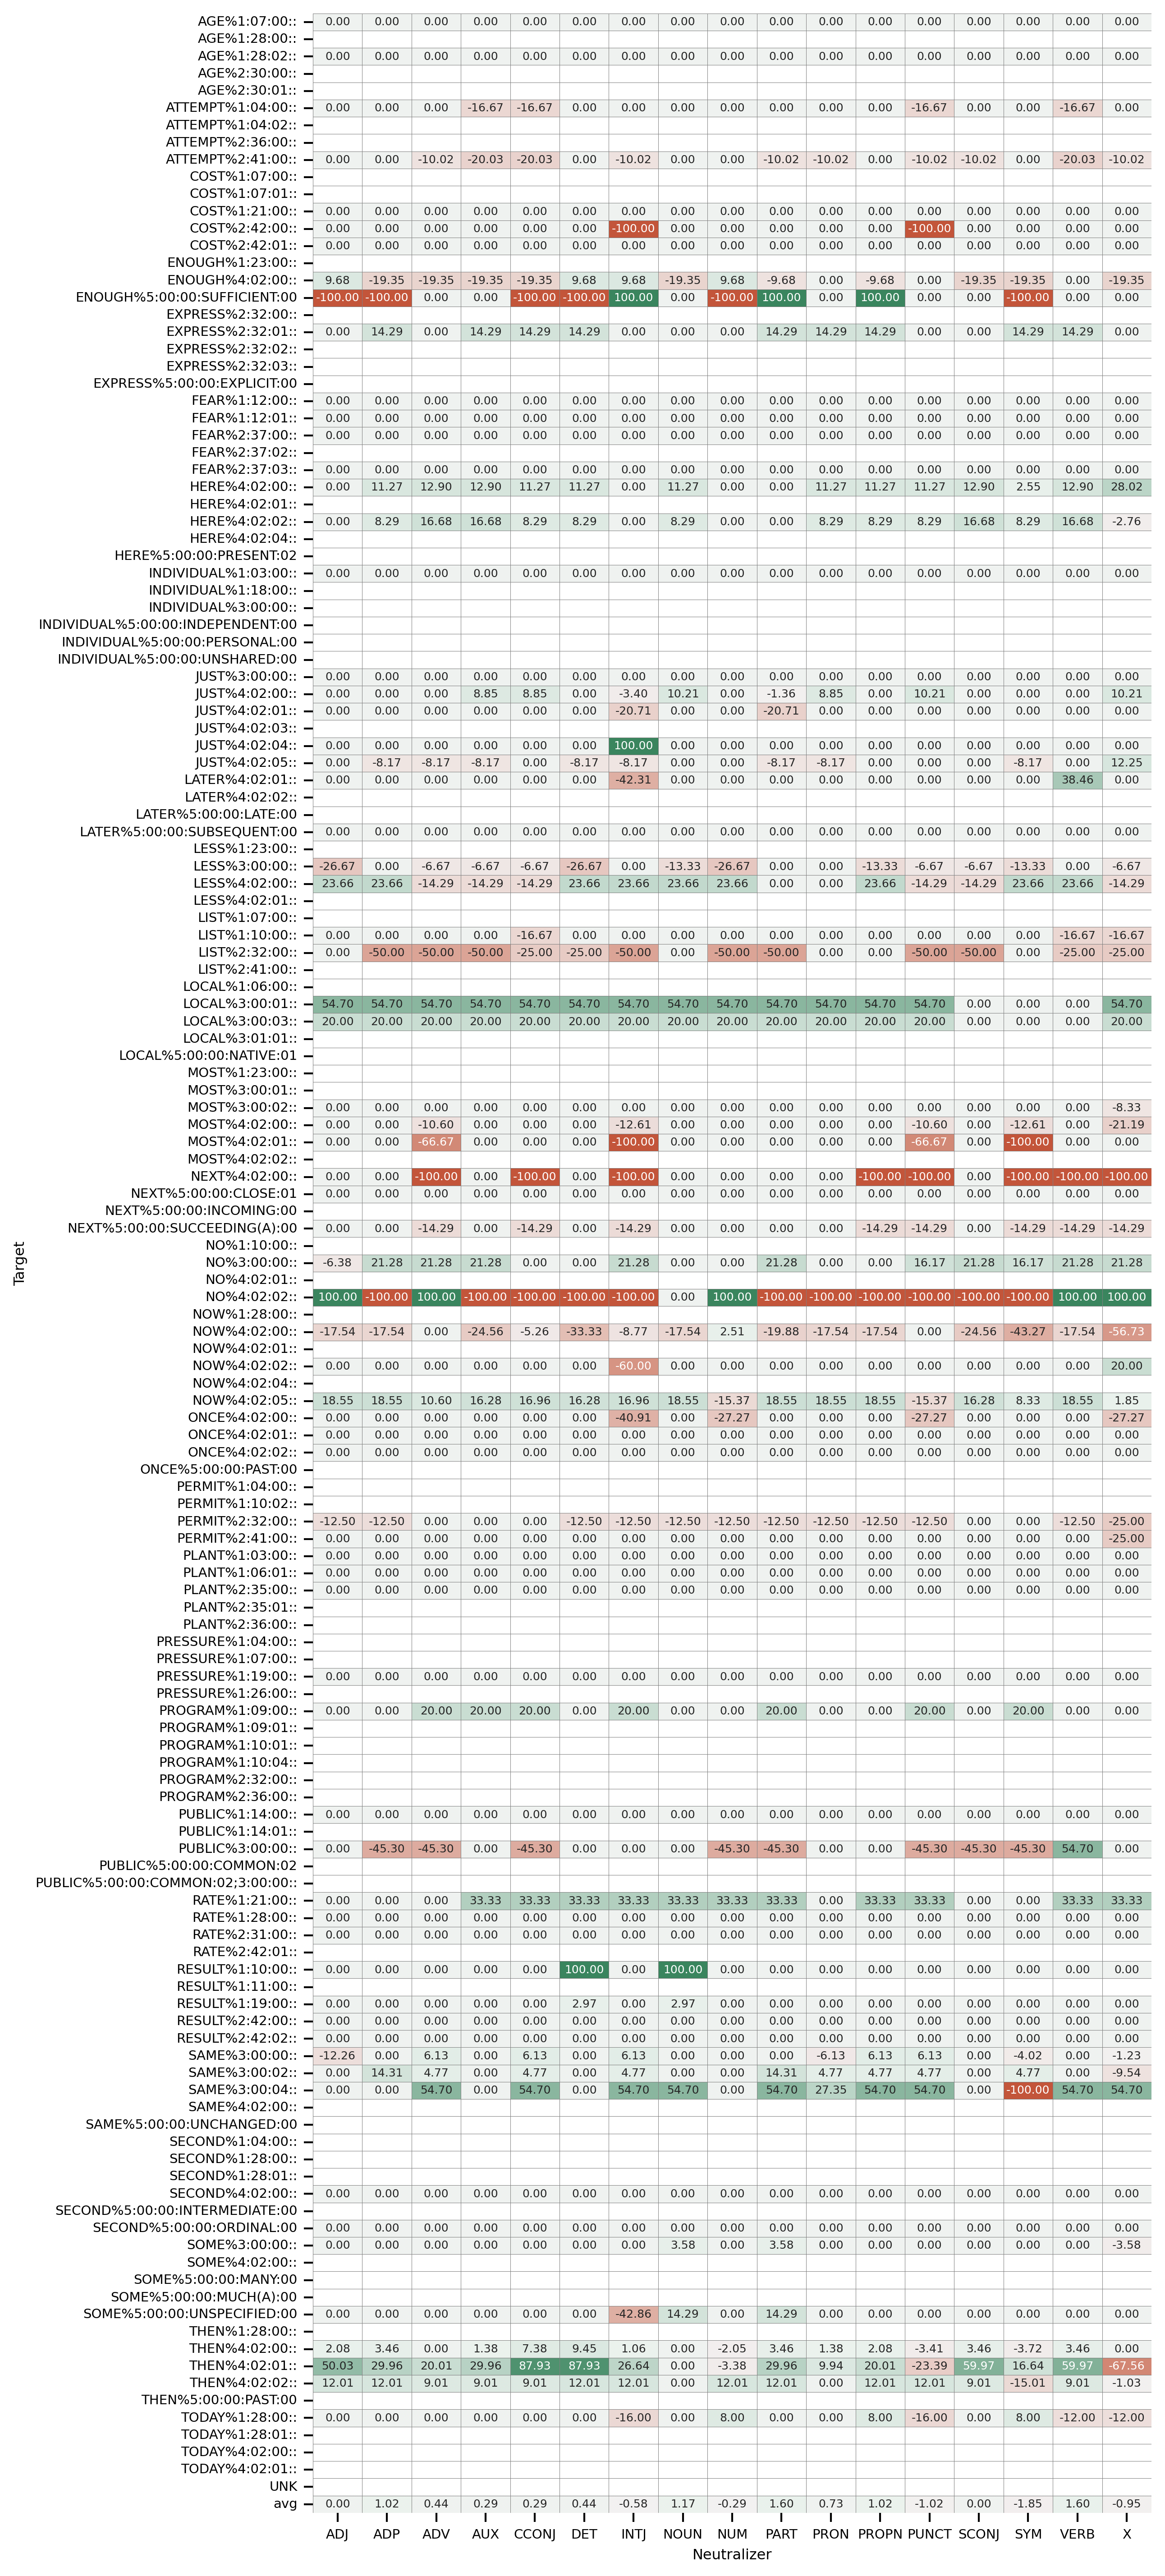

In [7]:
sns.set_context("paper", font_scale=0.8)
f, ax1 = plt.subplots(1, 1, figsize=(8, 24), dpi=300)
ax1 = sns.heatmap(
    lswsd_acc_drop * 100,
    annot=True,
    annot_kws={"fontsize": 6},
    fmt="0.2f",
    cmap=cmap,
    cbar=False,
    ax=ax1,
    vmin=-100,
    vmax=100,
    center=0,
    square=False,
    linewidths=0.2,
    linecolor="grey",
)
plt.show()